# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [190]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "C:/Users/15132/OneDrive/Desktop/matplotlib/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "C:/Users/15132/OneDrive/Desktop/matplotlib/Pymaceuticals/data//Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
pyma_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
pyma_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = pyma_data_complete["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_timepoint = pd.DataFrame(pyma_data_complete[["Mouse ID", "Timepoint"]])
mouse_dupe = mouse_timepoint[mouse_timepoint.duplicated(["Mouse ID", "Timepoint"], keep=False)]
id_dupe = mouse_dupe['Mouse ID'].unique()
id_dupe                              

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_data = pyma_data_complete[pyma_data_complete["Mouse ID"].isin(id_dupe)]
all_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_dupe_df = pyma_data_complete[pyma_data_complete["Mouse ID"] != "g989"]
dropped_dupe_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [14]:
# Checking the number of mice in the clean DataFrame.
dropped_mouse = dropped_dupe_df["Mouse ID"].nunique()
dropped_mouse

248

## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean_tumor = pyma_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = pyma_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = pyma_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_v = pyma_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = pyma_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem() 
drug_reg = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
# Assemble the resulting series into a single summary DataFrame.

single_summ = pd.DataFrame({
    "Drug Regimen": drug_reg,
    "Mean Tumor Volume": mean_tumor.values,
    "Median Tumor Volume": median_tumor.values,
    "Total Tumor Variance": variance.values,
    "Tumor Volume Std. Dev.": std_v.values,
    "Tumor Volume Std. Err.": sem.values
})


single_summ

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Total Tumor Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [46]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

one_liner = pyma_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

one_liner

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

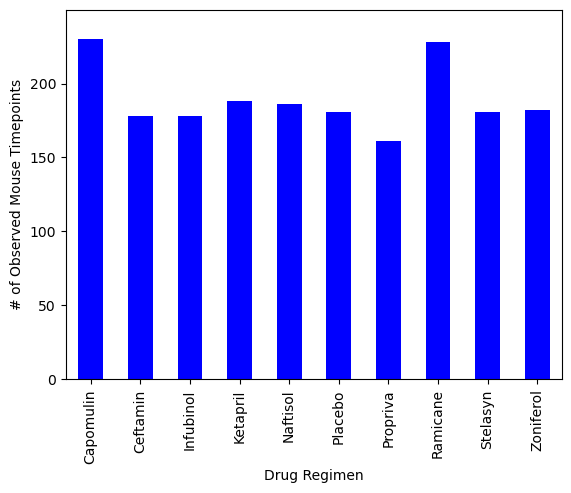

In [71]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

timepoints = pyma_data_complete.groupby("Drug Regimen")["Timepoint"].count()

pandas_df = (timepoints)
pandas_df.plot(kind="bar", x= "Drug Regimen", y= "Timepoints", color= "b", width= 0.5)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.ylim(0, 250)
plt.yticks(range(0, 250, 50))
plt.xticks(rotation="vertical")

plt.show()


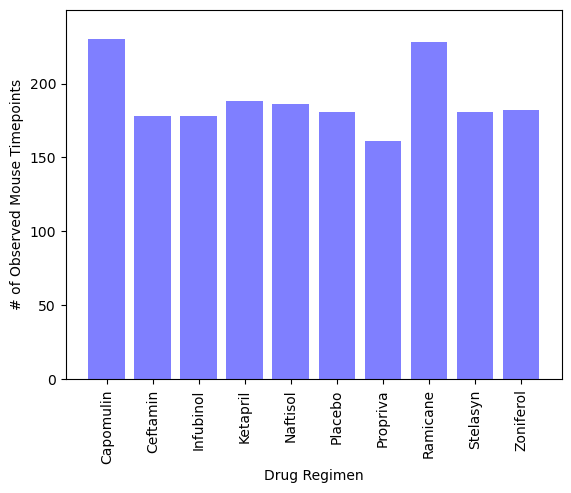

In [74]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

timepoints = pyma_data_complete.groupby("Drug Regimen")["Timepoint"].count()
bar_plot = plt.bar(drug_reg, timepoints, color = "b", alpha = 0.5, width= 0.8, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.ylim(0, 250)
plt.yticks(range(0, 250, 50))
plt.xticks(rotation="vertical")

plt.show()

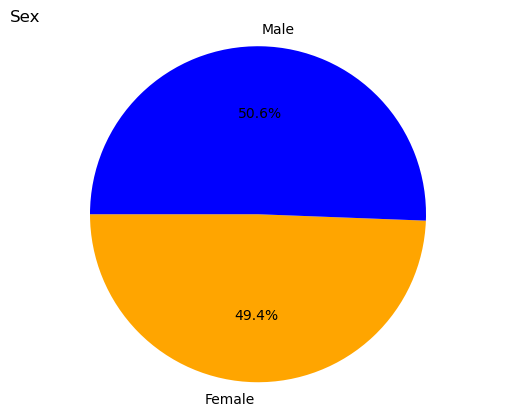

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

male_female = pyma_data_complete.groupby("Sex").size()
pandas_pie_df = (male_female)
pandas_pie_df = male_female.plot(kind= "pie", autopct= "%1.1f%%", startangle=180, colors = ["orange", "blue"], labels=["Female", "Male"])

plt.title("Sex", loc= "left")
plt.axis("equal")

plt.show()

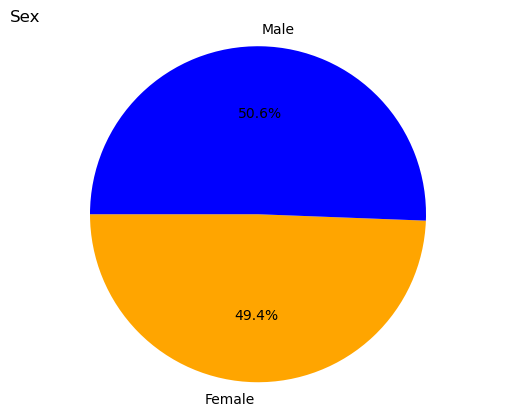

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

male_female = pyma_data_complete.groupby("Sex").size()
pie_plot = plt.pie(male_female, labels=["Female", "Male"], colors=["orange", "blue"], autopct="%1.1f%%", startangle=180)

plt.title("Sex", loc= "left")
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [169]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] 
four_df = pyma_data_complete[pyma_data_complete["Drug Regimen"].isin(four_treatments)]

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = four_df.groupby("Mouse ID")["Timepoint"].max()
final_timepoint_df = pd.DataFrame(final_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor = pd.merge(final_timepoint_df, pyma_data_complete, how="left", on=["Mouse ID", "Timepoint"])


final_tumor.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [170]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

total_vol_data = []
outliers = {}
four_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] 
four_df = final_tumor[final_tumor["Drug Regimen"].isin(four_treatments)]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

combined_data = four_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
quartiles = combined_data.quantile([.25,.5,.75])
lowerq = quartiles.loc[:, 0.25]
upperq = quartiles.loc[:, 0.75]
iqr = upperq - lowerq

 # Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5* iqr)
upper_bound = upperq + (1.5* iqr)


# Put treatments into a list for for loop (and later for plot labels)

for treatment in four_treatments:
    outliers[treatment] = combined_data.get_group(treatment).loc[
        (combined_data.get_group(treatment) < lower_bound[treatment]) |
        (combined_data.get_group(treatment) > upper_bound[treatment])
    ]
    
#print results 

for treatment in four_treatments:
    print(f"{treatment}'s potential outliers: {outliers[treatment]}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


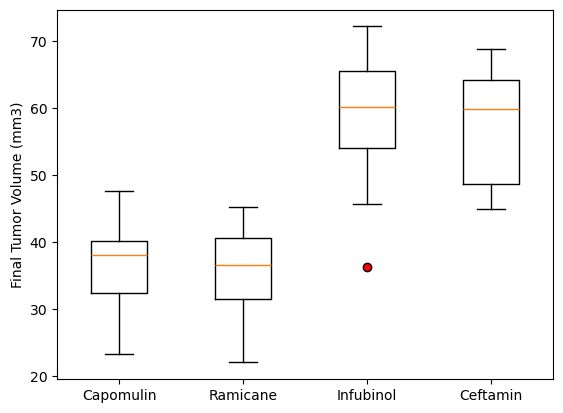

In [171]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

total_vol_data = []
for treatment in four_treatments:
   treatment_data = final_tumor[final_tumor["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
   total_vol_data.append(treatment_data.tolist())


fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(total_vol_data, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], flierprops= dict(markerfacecolor= "red"))
plt.show()

## Line and Scatter Plots

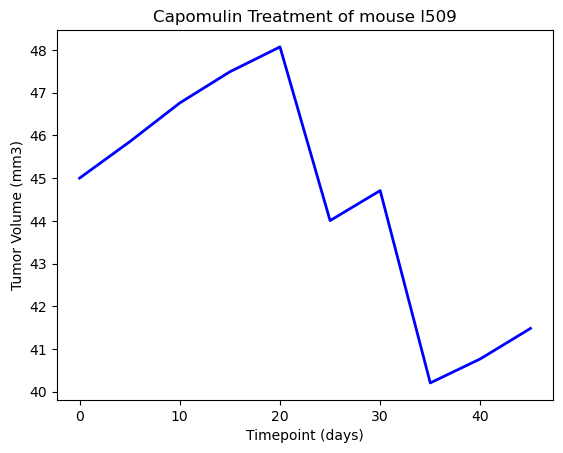

In [181]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = "l509"
capomulin_data = pyma_data_complete[(pyma_data_complete["Drug Regimen"] == "Capomulin") & (pyma_data_complete["Mouse ID"] == mouse_id)]

fig1, ax2 = plt.subplots()
ax2.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"], linestyle="-", linewidth= 2, color="b")
ax2.set_title("Capomulin Treatment of mouse l509")
ax2.set_xlabel("Timepoint (days)")
ax2.set_ylabel("Tumor Volume (mm3)")


plt.show()

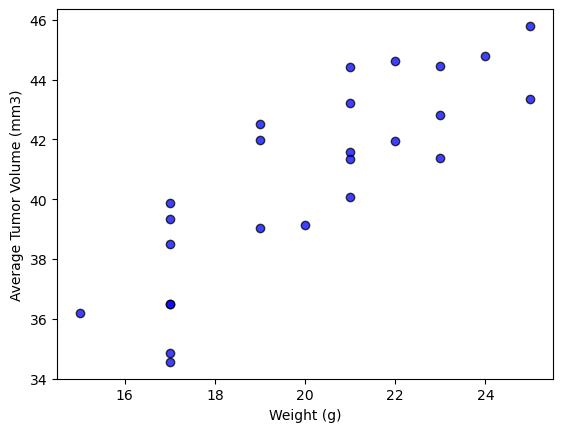

In [184]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_avg = pyma_data_complete.loc[pyma_data_complete["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
                                   
fig1, ax3 = plt.subplots()
ax3.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"], marker="o", facecolors="b", edgecolors="black", alpha=0.75)
ax3.set_xlabel("Weight (g)")
ax3.set_ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

 The correlation between mouse weight and the average tumor volume is 0.84


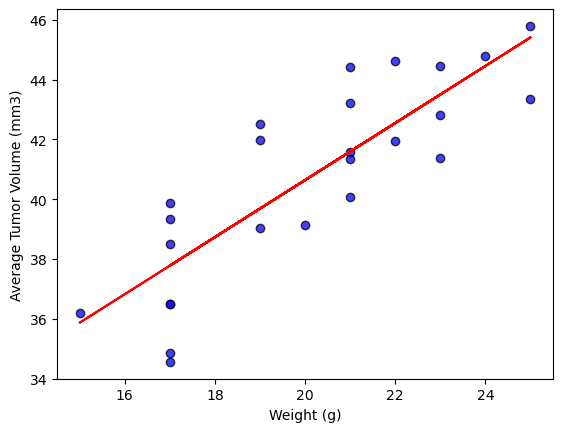

In [198]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = capomulin_avg["Weight (g)"].corr(capomulin_avg["Tumor Volume (mm3)"])
slope, intercept, r_value, p_value, std_err = stats.linregress(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
print(f" The correlation between mouse weight and the average tumor volume is{correlation_coefficient: .2f}")

capomulin_avg = pyma_data_complete.loc[pyma_data_complete["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
                                   
fig1, ax4 = plt.subplots()
ax4.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"], marker="o", facecolors="b", edgecolors="black", alpha=0.75)
ax4.plot(capomulin_avg["Weight (g)"], slope * capomulin_avg["Weight (g)"] + intercept, color="r", label="Linear Regression")
ax4.set_xlabel("Weight (g)")
ax4.set_ylabel("Average Tumor Volume (mm3)")
plt.show()


